# K-means Clustering for Anomaly Detection

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

## Introducing K-means

K-means clustering is a simple and useful unsupervised learning algorithm. The goal of K-means clustering is to group similar data points into a set number (K) of groups. The algorithms does this by identifying 'centroids', which are the centers of clusters, and then allocating data points to the nearest cluster.

Let's try a simple example. First we should generate some clustered data. You could imagine these clusters are different stages in the normal operation of a machine.

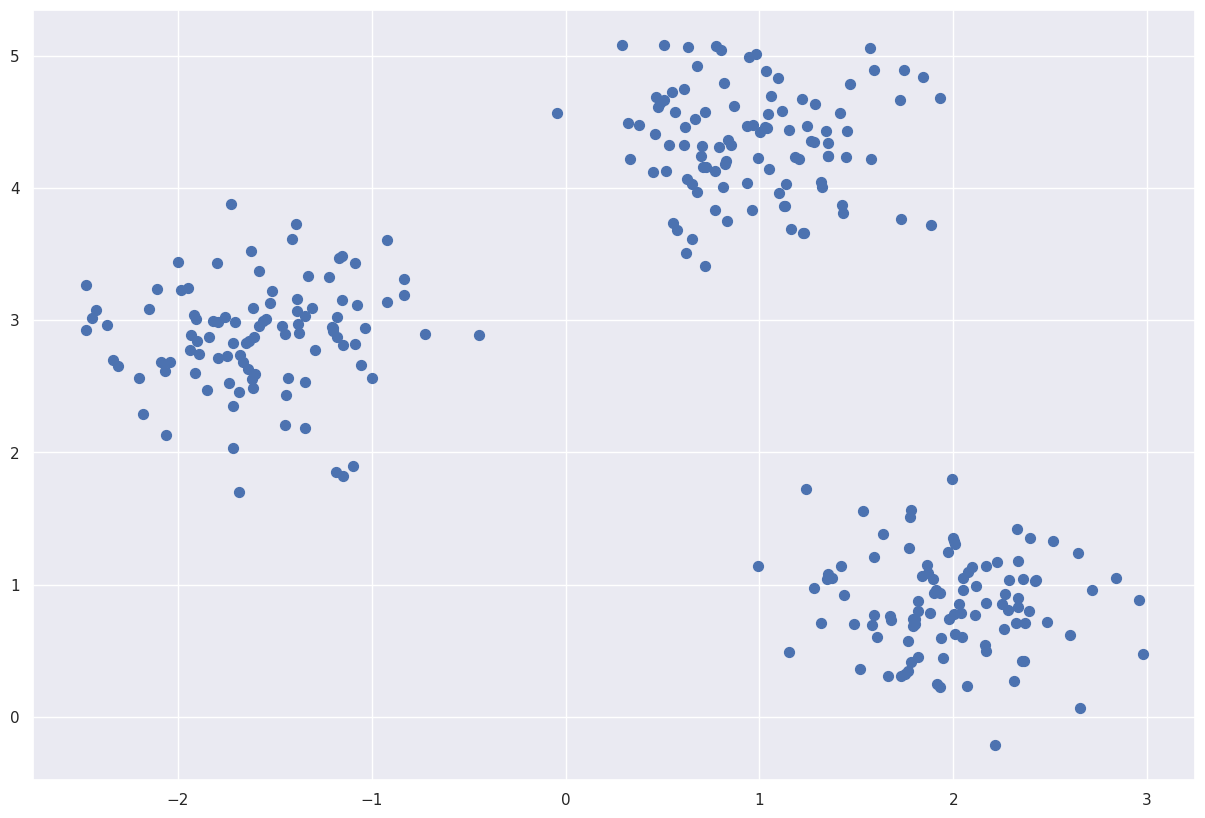

In [3]:
from sklearn.datasets import make_blobs
num_centers = 3
X_train, y_train_true = make_blobs(n_samples=300, centers=num_centers,
                                   cluster_std=0.40, random_state=0)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_true, s=50, cmap='viridis');
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);

In [4]:
X_train.shape

(300, 2)

In [5]:
X_train[:10]

array([[ 0.61114119,  4.75059384],
       [ 1.76502857,  0.34431808],
       [ 1.28068517,  4.35245733],
       [-1.56127632,  2.99559944],
       [-1.61472042,  2.48426761],
       [-1.52345285,  3.12868394],
       [ 1.24299373,  1.7234608 ],
       [ 0.48609587,  4.64153252],
       [-1.91110577,  2.60063532],
       [-0.83135494,  3.31564002]])

In [6]:
y_train_true

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2])

In this example it's pretty easy to visual distinguish the clusters.

Now lets use [SKLearn's KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm to fit to the data. This does a lot of the work for us, but if you would like to learn more about the underlying process check out the [wikipedia page](https://en.wikipedia.org/wiki/K-means_clustering#Algorithms)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_centers) #we select three clusters
kmeans.fit(X_train) #we fit the centroids to the data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
y_kmeans = kmeans.predict(X_train) #we determine the closest centroid for each datapoint

In [9]:
y_kmeans

array([1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1,
       2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0], d

Now let's visualize the results. Each datapoint is color-coded according to the centroid they correspond to, and the centroids themselves are shown as black circles.

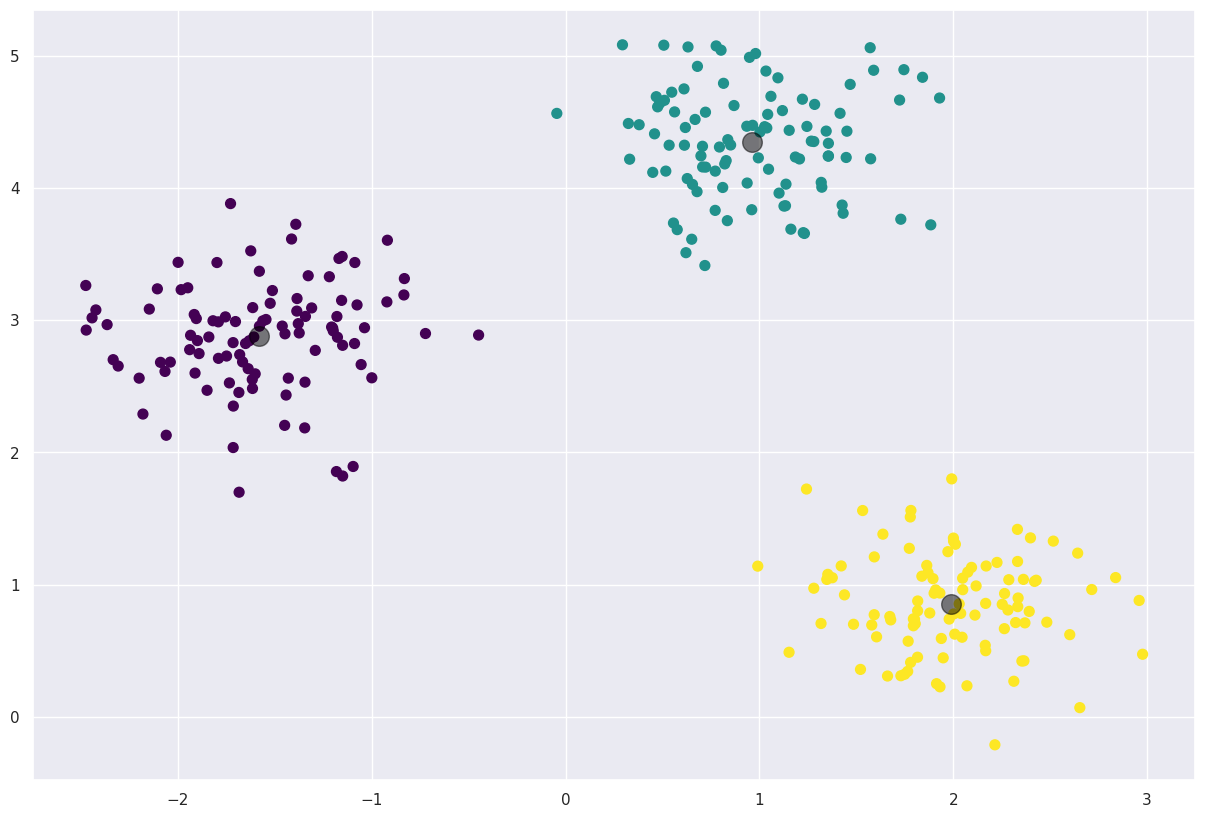

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Looks like K-means does a great job in this simple example! Now let's explore how we can use this for anomaly detection.

Below are new cluster that weren't part of our training data. We will pretend all of these are anomalies for the sake of a simple example. 

One of these clusters is completely different from the data we've seen before and another is only slightly different. We can easily visually separate one of the clusters, but the other one overlaps slightly with one of our training clusters. Given the low dimensionality of the data, it's reasonable that some new data is impossible to distinguish from the training data.

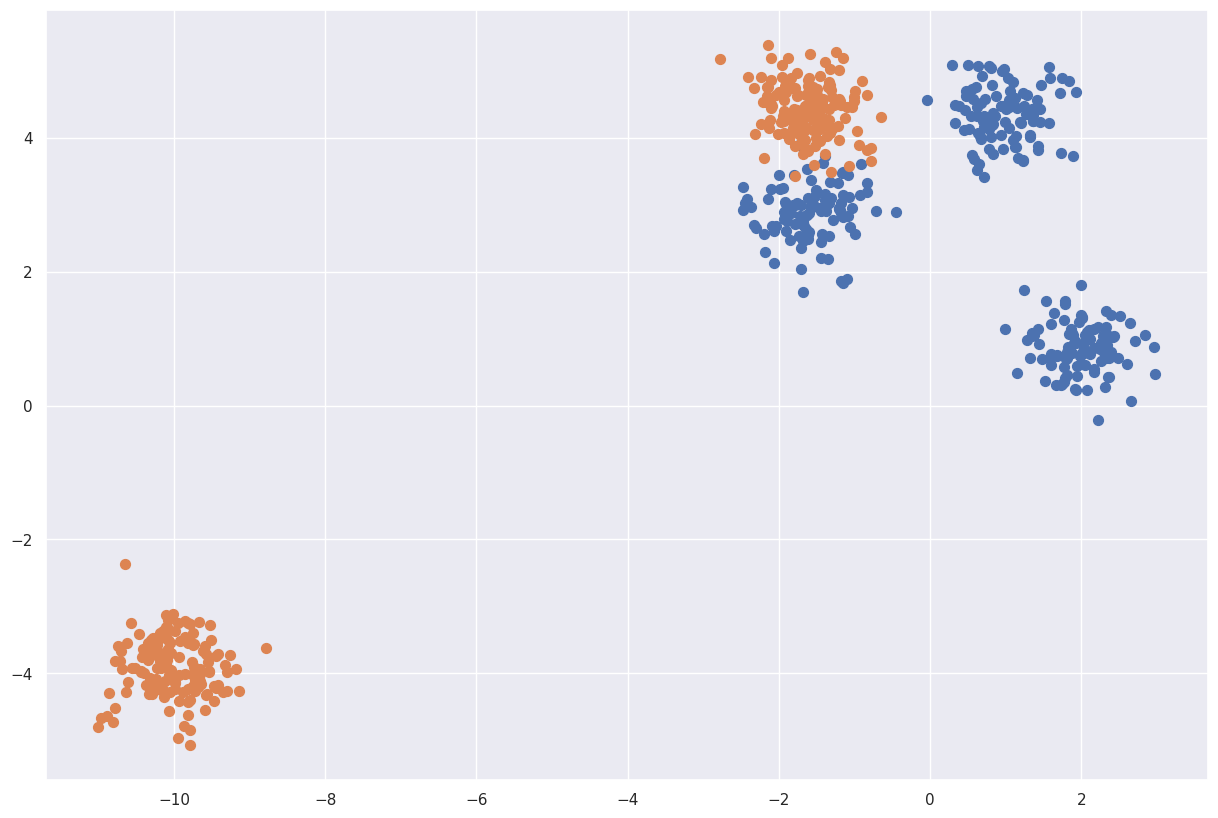

In [11]:
X_anomaly, y_anomaly_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.40, random_state=1)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], s=50);

First we will calculate the distances from each datapoint to it's closest cluster center and then we calculate the 99 percentile distance for each center that was observed in the training data. We use the 99 percentile distance here since our training data could have some outliers.

These distances will act as a bounday, beyond which we will classify datapoints as anomalies. The percentile can be adjusted to be more or less sensitive depending on the application and the training data.

In [12]:
percentile_treshold = 99

train_distances = kmeans.transform(X_train)

center_distances = {key: [] for key in range(num_centers)}
for i in range(len(y_kmeans)):
  min_distance = train_distances[i][y_kmeans[i]]
  center_distances[y_kmeans[i]].append(min_distance)

center_99percentile_distance = {key: np.percentile(center_distances[key], \
                                                   percentile_treshold)   \
                                for key in center_distances.keys()}

print(center_99percentile_distance)



{0: 1.1415867080723232, 1: 1.0315363528478958, 2: 1.0917976541677412}


Now let's plot those normal/abnomal boundaries on our training data to see how well they encompass our training data. We will also plot in yellow the points in our training data that are being classified as abnormal.

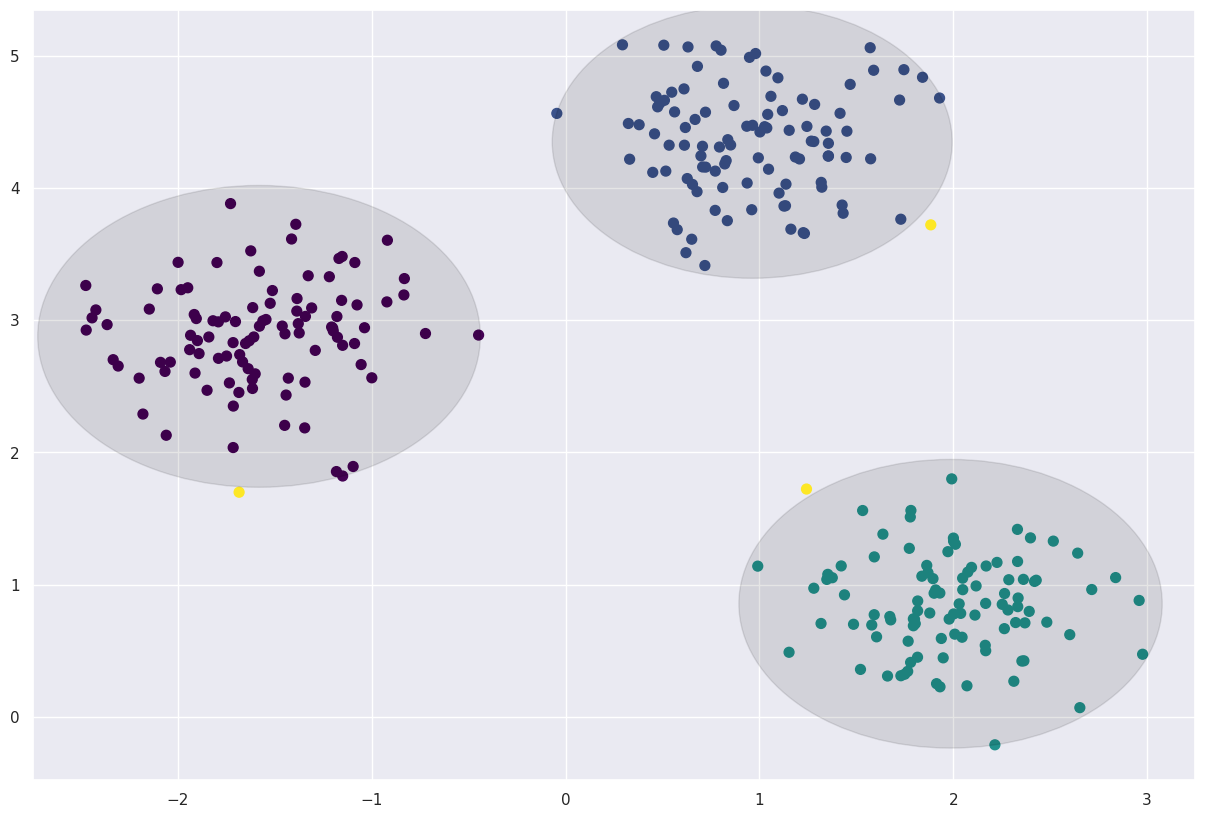

In [13]:
fig, ax = plt.subplots()

colors = []
for i in range(len(X_train)):
  min_distance = train_distances[i][y_kmeans[i]]
  if (min_distance > center_99percentile_distance[y_kmeans[i]]):
    colors.append(4)
  else:
    colors.append(y_kmeans[i])


ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

Now let's add in the abnormal test data to see how it's classified.

Normal datapoints misclassified as abnormal:  3
Abnormal datapoints misclassified as normal:  17


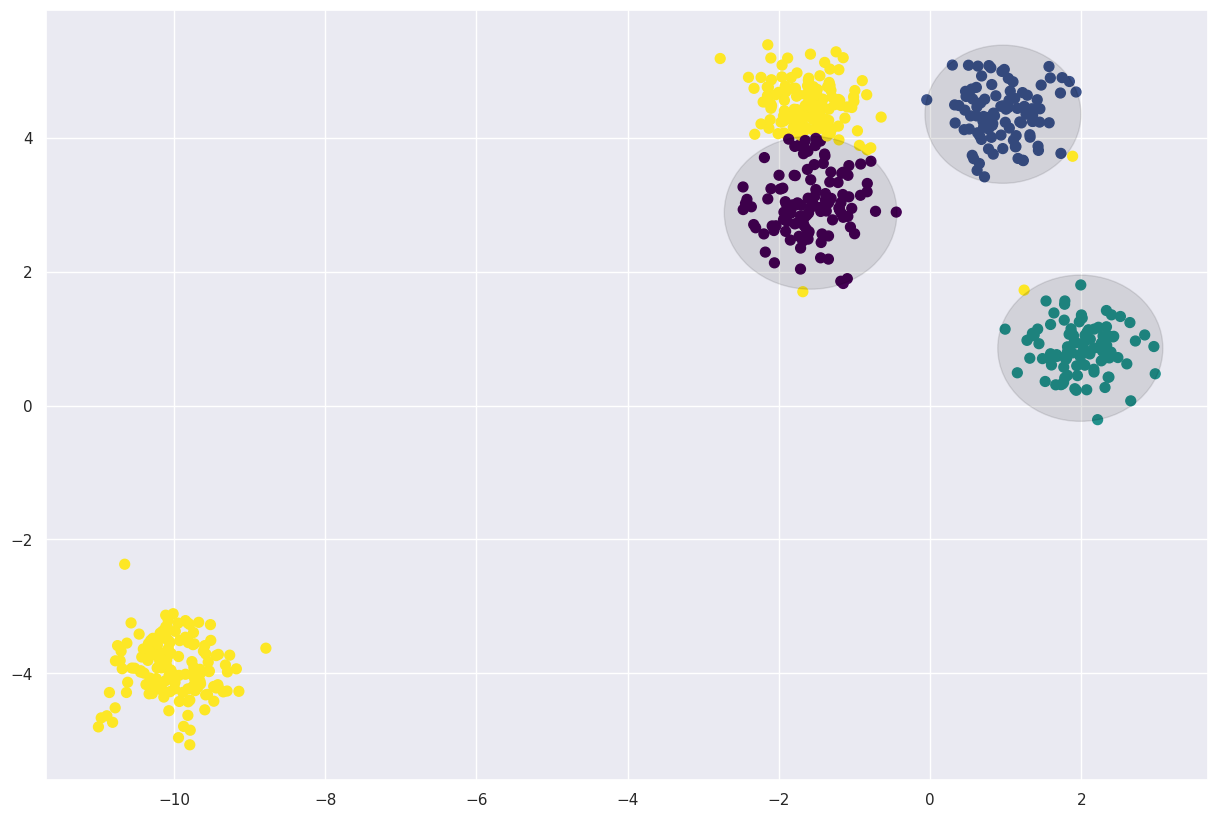

In [14]:
fig, ax = plt.subplots()

anomaly_distances = kmeans.transform(X_anomaly)
y_anomaly = kmeans.predict(X_anomaly)

#combine all the data
combined_distances = [*train_distances, *anomaly_distances]
combined_y = [*y_kmeans, *y_anomaly]
all_data = np.array([*X_train, *X_anomaly])

false_neg=0
false_pos=0

colors = []
for i in range(len(all_data)):
  min_distance = combined_distances[i][combined_y[i]]
  if (min_distance > center_99percentile_distance[combined_y[i]]):
    colors.append(4)
    if (i<300): #training data is the first 300 elements in the combined list
      false_pos+=1
  else:
    colors.append(combined_y[i])
    if (i>=300):
      false_neg+=1

ax.scatter(all_data[:, 0], all_data[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

print('Normal datapoints misclassified as abnormal: ', false_pos)
print('Abnormal datapoints misclassified as normal: ', false_neg)

Our simple model did a pretty good job! 

Now we have a way to classify abnormal data in a simple two dimension space. You can adjust the `percentile_treshold` variable to see how that impacts the number of false positives and false negatives.

Now let's see how well this applies to data with more dimensions.

##K-means on Digits



First we load in our dataset of **64** pixel images of numerical digits (think MNIST in 8x8 pixel images), **a much higher dimmension** than our 2-D problem we were dealing with earlier.

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

normal_data = []
abnormal_data = []

normal_label = []
abnormal_label = []

num_clusters = 8

#separate our data arbitrarily into normal (2-9) and abnormal (0-1)
for i in range(len(digits.target)):
  if digits.target[i]<10-num_clusters:
    abnormal_data.append(digits.data[i])
    abnormal_label.append(digits.target[i])
  else:
    normal_data.append(digits.data[i])
    normal_label.append(digits.target[i])

Next we find our cluster centers

In [16]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(normal_data)

kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(8, 64)

Next let's visualize the centers that K-means found for each cluster. We see that K-means is able to find clusters whose centers are recognizable digits. A bit blury, but still recognizable to the human eye!

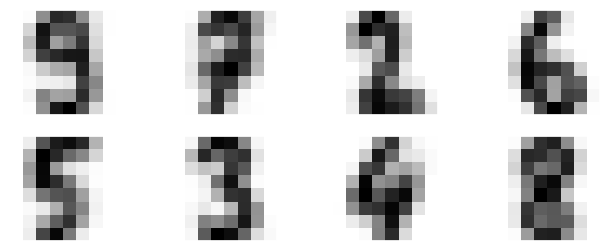

In [17]:
fig, ax = plt.subplots(2, int(num_clusters/2), figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(num_clusters, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Now let's find the 99 percentile boundary for these clusters as we did in the previous example.

In [18]:
percentile_treshold =99
normal_y = kmeans.predict(normal_data)
normal_distances = kmeans.transform(normal_data)
center_distances = {key: [] for key in range(num_clusters)}
for i in range(len(normal_y)):
  min_distance = normal_distances[i][normal_y[i]]
  center_distances[normal_y[i]].append(min_distance)

center_99percentile_distance = {key: np.percentile(center_distances[key], \
                                                   percentile_treshold)   \
                                for key in center_distances.keys()}

print(center_99percentile_distance)

{0: 39.91689814057058, 1: 40.4457496790435, 2: 34.48686817044241, 3: 33.49012149177819, 4: 36.042201290733075, 5: 36.35108790416124, 6: 38.30619421761721, 7: 39.65958713422169}


Now lets get the distance to each centroid for our anomalous data and combine it with our normal data. Then we can classify everything as either normal or abnormal based on the distances we calculated previously.

In [19]:
abnormal_y = kmeans.predict(abnormal_data)
abnormal_distances = kmeans.transform(abnormal_data)

#combine all the data
combined_distances = [*normal_distances, *abnormal_distances]
combined_y = [*normal_y, *abnormal_y]
normal_data_length = len(normal_data)
all_data = np.array([*normal_data, *abnormal_data])

false_neg=0
false_pos=0

for i in range(len(all_data)):
  min_distance = combined_distances[i][combined_y[i]]
  if (min_distance > center_99percentile_distance[combined_y[i]]):
    if (i<normal_data_length): #training data is first
      false_pos+=1
  else:
    if (i>=normal_data_length):
      false_neg+=1

print('Normal datapoints misclassified as abnormal: ', false_pos)
print('Abnormal datapoints misclassified as normal: ', false_neg)

Normal datapoints misclassified as abnormal:  18
Abnormal datapoints misclassified as normal:  297


The results are ok but not ideal. We can try adjusting the `percentile_treshold` variable to get better results. However, generally, K-means doesn't scale well with increased dimensionality. This example is still very low dimensional compared to many real world use cases and it still has a significant impact on our accuracy. This relationship is called the [***Curse of Dimensionality***](https://en.wikipedia.org/wiki/Curse_of_dimensionality) which plauges many conventional machine learning algorithms.

Next we will explore how to improve our K-means results with some pre-processing.

## Dimensionality Reduction

To combat the ***Curse of Dimensionality*** we can try projecting our data into a low dimensional space.

We can use the t-distributed stochastic neighbor embedding ([t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)) algorithm, to pre-process the data before feeding it into K-means. t-SNE is used to visualize high dimensional data and we can use it to reduce the dimensionality of our input data which will hopefully lead to better results!

First we will run TSNE on all of our data (normal and abnormal) and later split it into our train (normal) and test (abnormal) data. This is becasue t-SNE is a transductive learner and is not intended to transform data beyond what it is trained on. There are some recent [implementations](https://github.com/kylemcdonald/Parametric-t-SNE) of a [parametric t-sne algorithm](https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf) that can acomplish this but they are not included in sklearn.

In [20]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
print(digits_proj.shape)

(1797, 2)


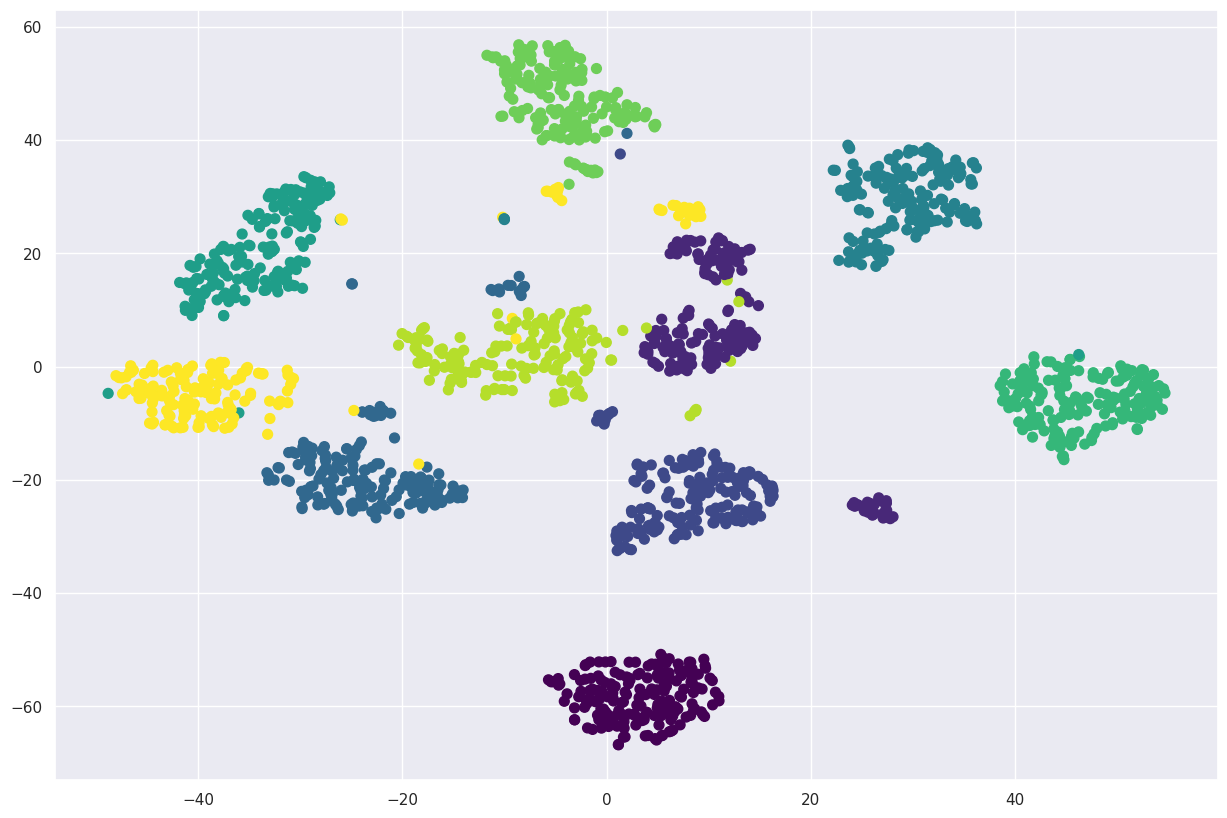

In [21]:
#Visualize our new data
fig, ax = plt.subplots()
ax.scatter(digits_proj[:, 0], digits_proj[:, 1],c=digits.target, s=50, cmap='viridis')

Now we have nicely separated two dimension data (down from our 64 pixel images)! This looks a lot more like the clusters in the first example

Next, we separate the data into normal and abnormal just like the previous example.

In [22]:
normal_data = []
abnormal_data = []

normal_label = []
abnormal_label = []

num_clusters = 8

#separate our data arbitrarily into normal (2-9) and abnormal (0-1)
for i in range(len(digits.target)):
  if digits.target[i]<10-num_clusters:
    abnormal_data.append(digits_proj[i])
    abnormal_label.append(digits.target[i])
  else:
    normal_data.append(digits_proj[i])
    normal_label.append(digits.target[i])

Now run K-means and calculate our percentile threshold.

In [23]:
# Compute the clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(normal_data)

#calculate the percentile bounday
percentile_treshold =99
normal_y = kmeans.predict(normal_data)
normal_distances = kmeans.transform(normal_data)
center_distances = {key: [] for key in range(num_clusters)}
for i in range(len(normal_y)):
  min_distance = normal_distances[i][normal_y[i]]
  center_distances[normal_y[i]].append(min_distance)

center_99percentile_distance = {key: np.percentile(center_distances[key], \
                                                   percentile_treshold)   \
                                for key in center_distances.keys()}

print(center_99percentile_distance)



{0: 11.765791789714108, 1: 20.564414733308976, 2: 14.687096663768779, 3: 9.936348446486843, 4: 13.298115809420839, 5: 20.039431652614812, 6: 15.358522412862174, 7: 9.755720035196443}


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Finally we calculate the distances of our abnormal data to our cluster centers. Then count the number of false negatives and false positives and plot all the data.

Normal datapoints misclassified as abnormal:  16
Abnormal datapoints misclassified as normal:  51


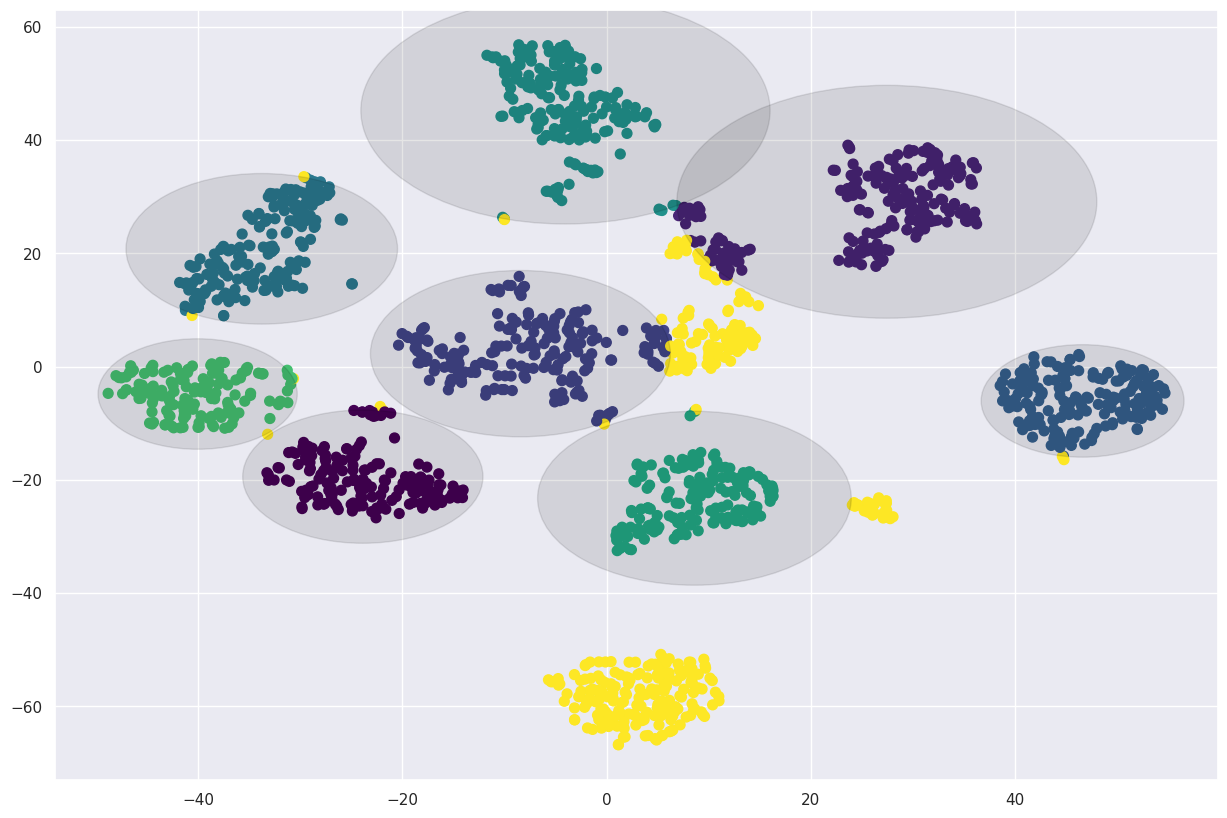

In [24]:
abnormal_y = kmeans.predict(abnormal_data)
abnormal_distances = kmeans.transform(abnormal_data)

#combine all the data
combined_distances = [*normal_distances, *abnormal_distances]
combined_y = [*normal_y, *abnormal_y]
normal_data_length = len(normal_data)
all_data = np.array([*normal_data, *abnormal_data])

false_neg=0
false_pos=0
colors = []
for i in range(len(all_data)):
  min_distance = combined_distances[i][combined_y[i]]
  if (min_distance > center_99percentile_distance[combined_y[i]]):
    colors.append(10)
    if (i<normal_data_length): #training data is first in combined set
      false_pos+=1
  else:
    colors.append(combined_y[i])
    if (i>=normal_data_length):
      false_neg+=1

fig, ax = plt.subplots()
ax.scatter(all_data[:, 0], all_data[:, 1], c=colors, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

print('Normal datapoints misclassified as abnormal: ', false_pos)
print('Abnormal datapoints misclassified as normal: ', false_neg)

# Autoencoders for Anomaly Detection

Now, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

This time 10% of our training set is anomalies the labels are not available at training time. This is to reflect a truely unsupervised scenario where we may not have access to labeled data or a expert knowledge. Since the majority of our training data is still normal, we are still able to train a high performing model as long as we don't overfit to our training data.

You will **first select the size of the encoding layer and try to maximize the AUC metric**. Be careful, if the model is too large it can learn to recreate the abnormal data as well as the normal data, and therefore do a worse job a distinguishing them.

Next, you will **pick a error threshold to maxmize accuracy, precision, and recall.** There is often a tradeoff between high precision and high recall, therefore it is up to you to decide what is important to our ECG classification application. Remember that our model predicts `1` when it predicts a normal rhythm.



### Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]` to improve training accuracy.


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

This time we are mixing in some of the anomaly data into the training set. 10% of the training data will contain anomalies. Since the majority of the training data is still normal data, we can still train a high performing model as long as we don't overfit to the training data.

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

portion_of_anomaly_in_training = 0.1 #10% of training data will be anomalies
end_size = int(len(normal_train_data)/(10-portion_of_anomaly_in_training*10))
combined_train_data = np.append(normal_train_data, anomalous_test_data[:end_size], axis=0)
combined_train_data.shape

(2621, 140)

Plot a normal ECG. 

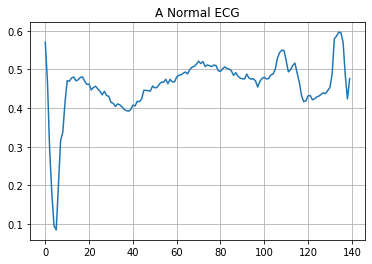

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

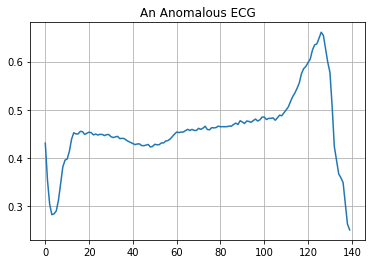

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Picking an Embedding to Build the Model

After training and evaluating the example model, try modifying the size and number of layers to build an understanding for autoencoder architectures.

Note: Changing the size of the embedding (the smallest layer) can produce interesting results. Feel free to play around with that layer size.

In [ ]:
EMBEDDING_SIZE = 2

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(EMBEDDING_SIZE, activation="relu")]) # Smallest Layer Defined Here
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()
print("Chosen Embedding Size: ", EMBEDDING_SIZE)

Chosen Embedding Size:  2


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)
autoencoder.compile(optimizer=optimizer, loss='mae')

### Train the model

Notice that the autoencoder is now trained using the combined training data which is primarily normal ECGs with some anomalies mixed in. It is still evaluated using the full test set.

In [ ]:
history = autoencoder.fit(combined_train_data, combined_train_data, epochs=50, 
                          batch_size=512, validation_data=(test_data, test_data), shuffle=True)

Epoch 1/50
6/6 [==============================] - 2s 69ms/step - loss: 0.0556 - val_loss: 0.0467
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0463 - val_loss: 0.0421
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0398
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0389
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0322 - val_loss: 0.0385
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0308 - val_loss: 0.0380
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0296 - val_loss: 0.0373
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0290 - val_loss: 0.0366
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0284 - val_loss: 0.0360
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0274 - val_loss: 0.0354
Epoch 11/50
6/6 [====================

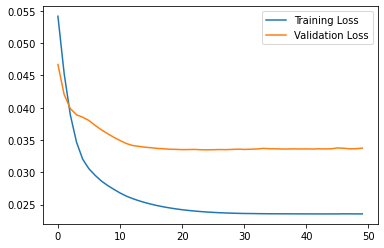

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Evaluate Training

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

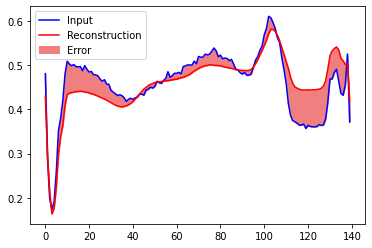

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

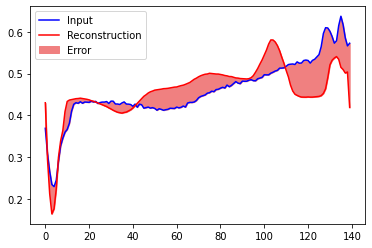

In [ ]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### ROC and AUC Metrics

The Receiver Operating Characteristic (ROC) plots allows us to visualize the tradeoff between predicting anomalies as normal (false positives) and predicting normal data as an anomaly (false negative). Normal rhythms are labeled as `1` in this dataset but we have to flip them here to match the ROC curves expectations.

The ROC plot now has threshold values plotted on their corrispoinding points on the curve to aid in selecting a theshold for the application.

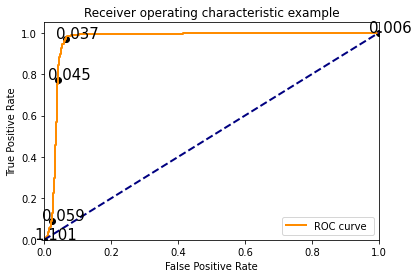

In [ ]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)
fpr = []
tpr = []
#the test labels are flipped to match how the roc_curve function expects them.
flipped_labels = 1-test_labels 
fpr, tpr, thresholds = roc_curve(flipped_labels, loss)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# plot some thresholds
thresholds_every=20
thresholdsLength = len(thresholds)
colorMap=plt.get_cmap('jet', thresholdsLength)
for i in range(0, thresholdsLength, thresholds_every):
  threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
  plt.scatter(fpr[i], tpr[i], c='black')
  plt.text(fpr[i] - 0.03, tpr[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 15});

plt.show()


Since our model does a great job in diferentiating normal rythms from abnormal ones it seems easy to pick the threshold that would give us the high true positive rate (TPR) and low false positive rate (FPR) that is at the 'knee' of the curve.

However, in some cases there may be an application constraint that requires a specific TPR or FPR, in which case we would have to move off of the 'knee' and sacrifice overall accuracy. In this case we might rather have false alarms than miss a potentially dangerous rythm.

Now that we understand how to visualize the impact of the selected threshold, we calculate the area under the ROC curve (AUC). 

This metric is very useful for evalutation of a specfic model design. Adjust the size of the encoding layer (smallest layer) in the autoencoder to maximize this metric.

In [ ]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.961103896103896


### Picking a Threshold to Detect Anomalies
Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold.

Try to maximize the accuracy, precision, and recall. Think about the application and the consequences of a false positive and a false negative.

In [ ]:
threshold = 0.037
print("Chosen Threshold: ", threshold)

Chosen Threshold:  0.037


In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold), loss

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


In [ ]:
preds, scores = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.952
Precision = 0.9794007490636704
Recall = 0.9339285714285714
